<a href="https://colab.research.google.com/github/ThomalaSahithi/OIBSIP/blob/main/Email_spam_Detection_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

LOADING THE DATASET

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

DATA CLEANING

In [5]:
# Renaming columns
df.columns = ['label', 'text', 'drop_1', 'drop_2', 'drop_3']

# Drop the unnecessary columns
df = df.drop(columns=['drop_1', 'drop_2', 'drop_3'])

In [6]:
# Check for missing values and remove rows with missing 'label' or 'text'
print("Missing values per column:")
print(df.isnull().sum())
df = df.dropna(subset=['label', 'text'])

# Convert labels: 'spam' to 1 and 'ham' to 0 for easier processing
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Remove duplicate rows
df = df.drop_duplicates()

# Display the cleaned data
print("\nCleaned DataFrame:")
print(df.head())

Missing values per column:
label    0
text     0
dtype: int64

Cleaned DataFrame:
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


TEXT PREPROCESSING

In [7]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (only needed once)
nltk.download('stopwords')

# Text preprocessing function
def preprocess_text(text):
    # Remove non-word characters and convert text to lowercase
    text = re.sub(r'\W', ' ', text).lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))
    return text

# Apply text preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display preprocessed text data
print("\nPreprocessed DataFrame:")
print(df[['label', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Preprocessed DataFrame:
   label                                       cleaned_text
0      0  go jurong point crazy available bugis n great ...
1      0                            ok lar joking wif u oni
2      1  free entry 2 wkly comp win fa cup final tkts 2...
3      0                u dun say early hor u c already say
4      0             nah think goes usf lives around though


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract features from text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Target variable
y = df['label']

print("\nFeature extraction complete. Sample of feature matrix:")
print(X.toarray()[:5])



Feature extraction complete. Sample of feature matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


VISUALIZATIONS

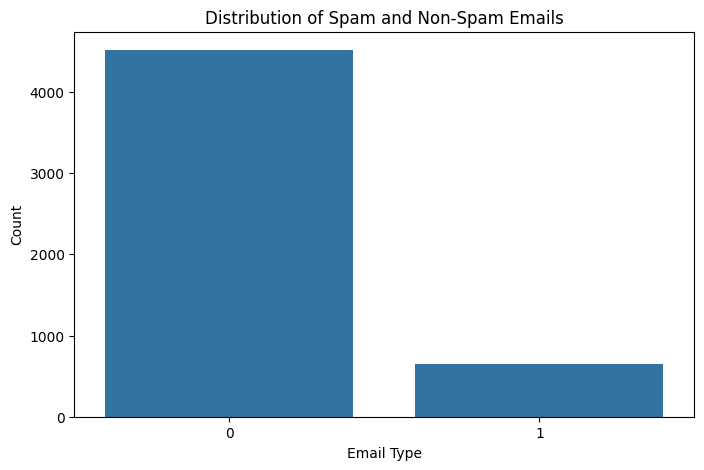

In [9]:
#Visualize the distribution of spam and non-spam emails
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

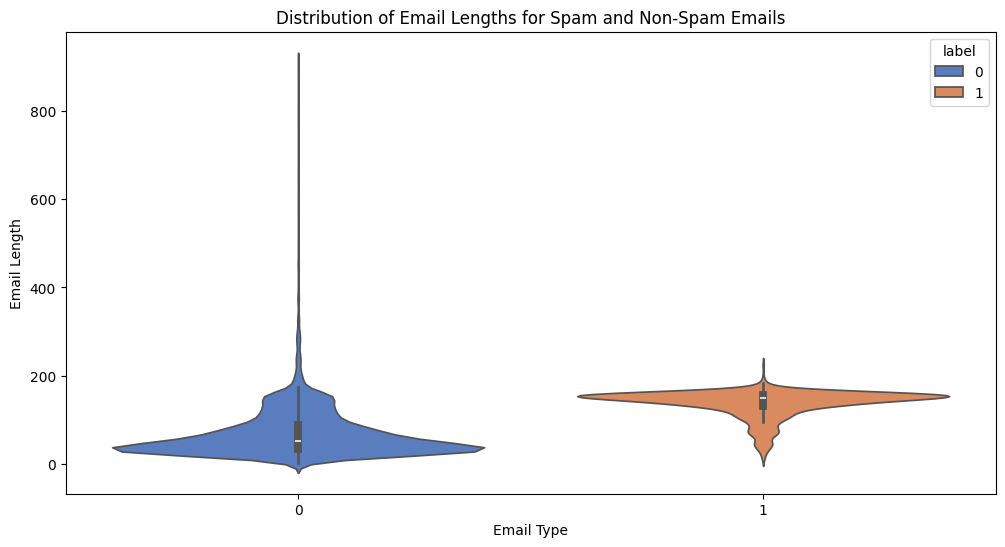

In [10]:
# Violin chart visualization for the distribution of email lengths
df['email_length'] = df['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='email_length', data=df, hue = 'label', palette='muted')
plt.title('Distribution of Email Lengths for Spam and Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Email Length')
plt.show()

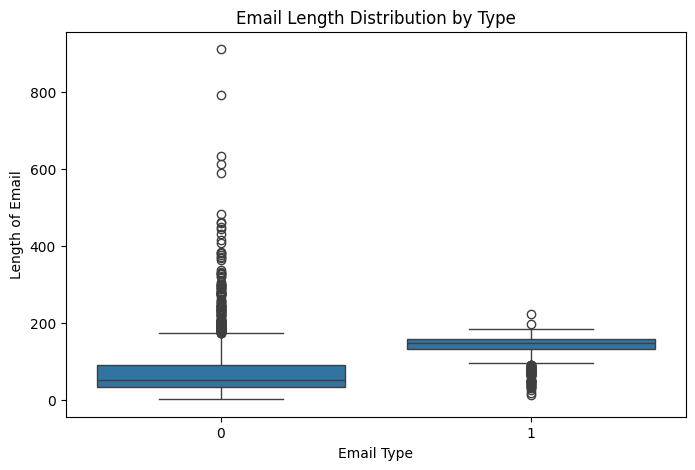

In [11]:
#Visualize the average length of spam vs non-spam emails
df['email_length'] = df['text'].apply(len)

plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='email_length', data=df)
plt.title('Email Length Distribution by Type')
plt.xlabel('Email Type')
plt.ylabel('Length of Email')
plt.show()


Cleaned DataFrame:
   label                                               text  \
0      0  Go until jurong point, crazy.. Available only ...   
1      0                      Ok lar... Joking wif u oni...   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...   
3      0  U dun say so early hor... U c already then say...   
4      0  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  email_length  Length  \
0  go jurong point crazy available bugis n great ...           111     111   
1                            ok lar joking wif u oni            29      29   
2  free entry 2 wkly comp win fa cup final tkts 2...           155     155   
3                u dun say early hor u c already say            49      49   
4             nah think goes usf lives around though            61      61   

   num_words  num_sentences  
0         20              3  
1          6              2  
2         28              1  
3         11

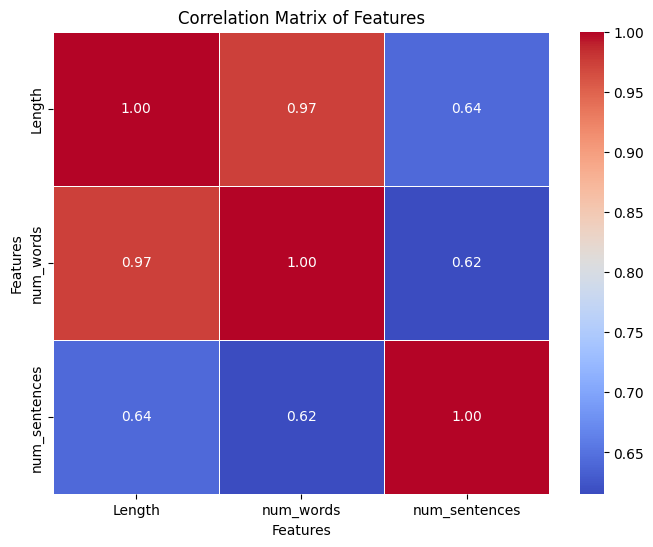

In [12]:
#Calculate email lengths, number of words, and number of sentences
df['Length'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_sentences'] = df['text'].apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())

# Part 3: Correlation matrix
correlation_matrix = df[['Length', 'num_words', 'num_sentences']].corr()
print("The Relationship between Features is:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

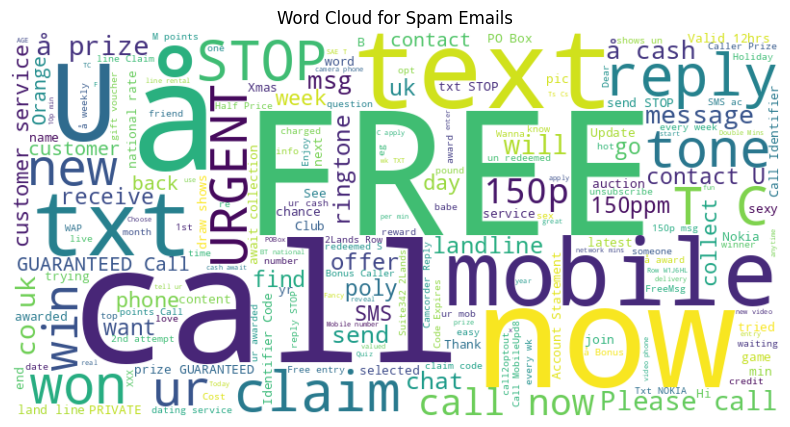

In [13]:
#Generate Word Cloud for Spam Emails
spam_words = ' '.join(df[df['label'] == 1]['text']) # Changed 'spam' to 1 assuming label is numeric
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

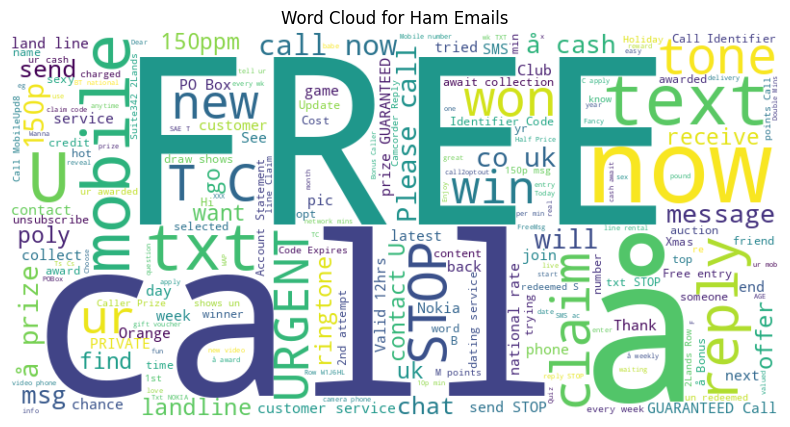

In [14]:
#Generate Word Cloud for Ham Emails
ham_words = ' '.join(df[df['label'] == 1]['text'])
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()

SPLITTING THE DATASET

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Data split into training and testing sets.
Training set size: 4135
Testing set size: 1034


MODEL 1 : NAIVE BAYES

Model training complete.
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       889
           1       0.90      0.95      0.92       145

    accuracy                           0.98      1034
   macro avg       0.94      0.97      0.96      1034
weighted avg       0.98      0.98      0.98      1034



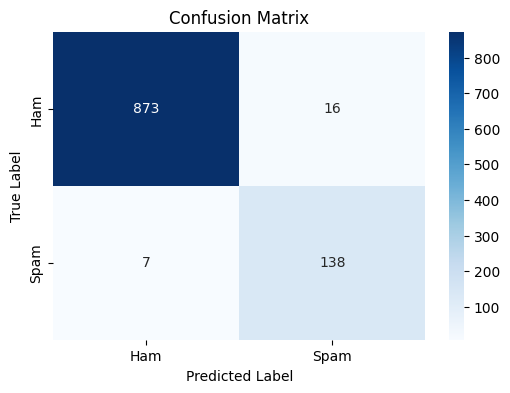

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


MODEL 2 : LOGISTIC REGRESSION

Model training complete.
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.85      0.91       145

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



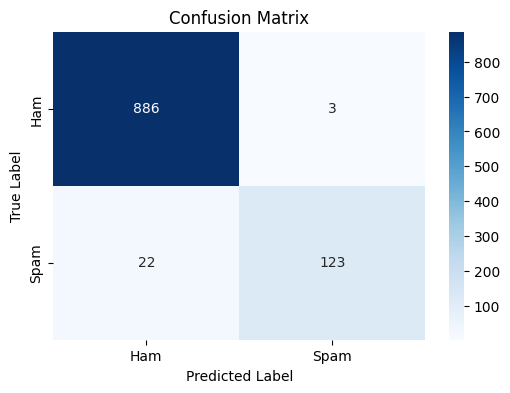

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


MODEL 3 : SUPPORT VECTOR MACHINE(SVM)

Model training complete.
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.88      0.93       145

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



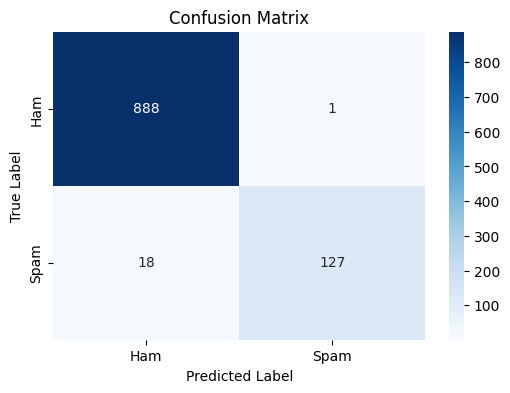

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the SVC model
model = SVC(kernel='linear')  # You can try different kernels: 'linear', 'poly', 'rbf', etc.
model.fit(X_train, y_train)

print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


MODEL 4 : DECISION TREE

Model training complete.
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       889
           1       0.85      0.82      0.84       145

    accuracy                           0.95      1034
   macro avg       0.91      0.90      0.90      1034
weighted avg       0.95      0.95      0.95      1034



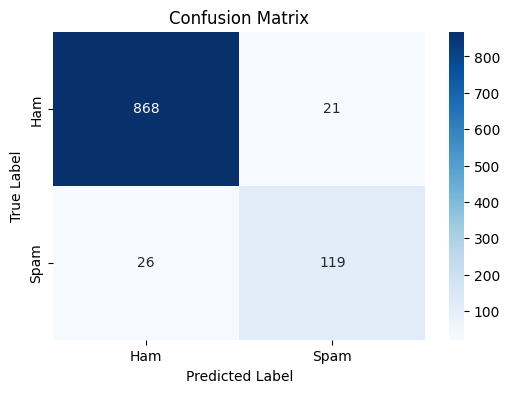

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


MODEL 5 : RANDOM FOREST

Model training complete.
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.99      0.82      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



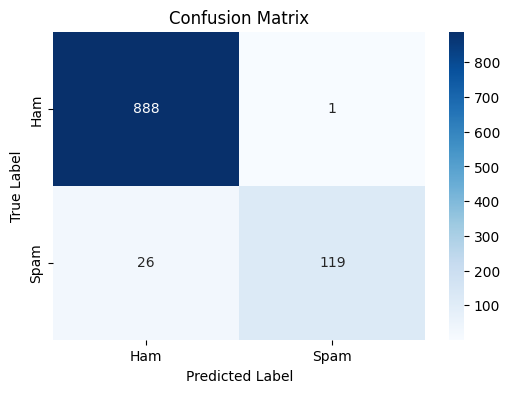

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
model.fit(X_train, y_train)

print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


FINDING BEST MODEL

In [21]:
# models
from sklearn.model_selection import cross_val_score
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Function to evaluate the models using cross-validation
def evaluate_models(models, X, y):
    results = {}
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")

        # Perform 5-fold cross-validation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

        # Store the results
        results[model_name] = cv_scores.mean()

    return results

# Evaluate the models
results = evaluate_models(models, X_train, y_train)

# Print the results
print("\nCross-validation Accuracy Scores for Different Models:")
for model_name, score in results.items():
    print(f"{model_name}: {score:.4f}")

# Find the best model
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

Evaluating Naive Bayes...
Evaluating Logistic Regression...
Evaluating SVC...
Evaluating Decision Tree...
Evaluating Random Forest...

Cross-validation Accuracy Scores for Different Models:
Naive Bayes: 0.9758
Logistic Regression: 0.9780
SVC: 0.9804
Decision Tree: 0.9644
Random Forest: 0.9705

Best Model: SVC with Accuracy: 0.9804


PREDICTIONS BASED ON USER INPUT

In [25]:
#prediction from input
def preprocess_text(text):
  text = text.lower()
  return text

def predict_spam(email_text):
    email_cleaned = preprocess_text(email_text)
    email_vectorized = vectorizer.transform([email_cleaned])
    prediction = model.predict(email_vectorized)
    return 'Spam' if prediction[0] == 1 else 'Not Spam'

# User input for the email text
example_email = input("Enter the email text to predict if it's spam or not: ")

# Print the prediction result
print(f"Prediction: {predict_spam(example_email)}")


Enter the email text to predict if it's spam or not: "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now."
Prediction: Spam
